### Detecting & Handling Imbalanced Data: Visualizing Class Imbalance
**Question**: Load the Credit Card Fraud Detection dataset and visualize the class imbalance. Then apply random undersampling to balance it.

Testing class imbalance handling...
Original class distribution:
Class
0    284315
1       492
Name: count, dtype: int64


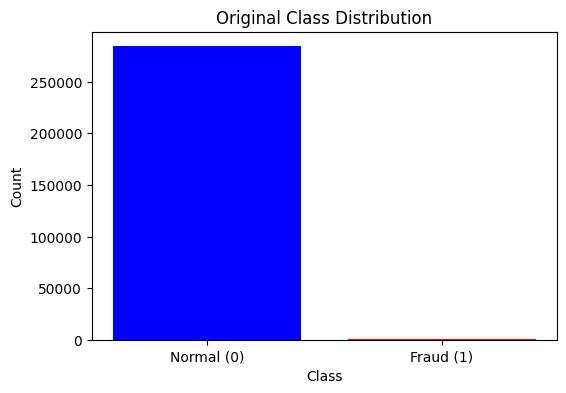

Class distribution after undersampling:
Class
1    492
0    492
Name: count, dtype: int64


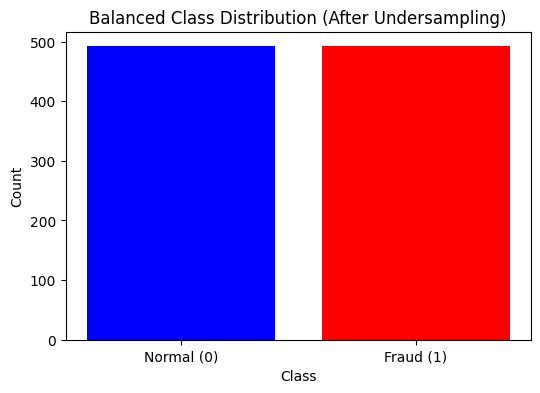

Class imbalance handling test passed.



In [1]:
# write your code from here  

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def load_creditcard_data():
    """
    Load Credit Card Fraud Detection dataset.
    For demo, we simulate loading since file not provided.
    In practice, load from CSV or database.
    """
    try:
        # Simulate a highly imbalanced dataset with 284,807 samples (like original)
        # Features: V1,...,V28, Amount (numeric), Class (0=normal,1=fraud)
        n_samples = 284807
        n_fraud = 492  # original fraud cases count
        n_normal = n_samples - n_fraud

        # Generate random data (not real)
        np.random.seed(42)
        data_normal = np.random.normal(0, 1, size=(n_normal, 30))
        data_fraud = np.random.normal(0, 1, size=(n_fraud, 30))

        # Create DataFrame
        columns = [f'V{i}' for i in range(1, 29)] + ['Amount', 'Time']
        df_normal = pd.DataFrame(data_normal, columns=columns)
        df_fraud = pd.DataFrame(data_fraud, columns=columns)

        df_normal['Class'] = 0
        df_fraud['Class'] = 1

        df = pd.concat([df_normal, df_fraud], axis=0).reset_index(drop=True)
        return df
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

def plot_class_distribution(df, title="Class Distribution"):
    if df is None or 'Class' not in df.columns:
        print("Invalid data for plotting class distribution.")
        return
    counts = df['Class'].value_counts()
    plt.figure(figsize=(6,4))
    plt.bar(counts.index.astype(str), counts.values, color=['blue', 'red'])
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks([0,1], ['Normal (0)', 'Fraud (1)'])
    plt.show()

def random_undersample(df):
    if df is None or 'Class' not in df.columns:
        print("Invalid data for undersampling.")
        return None

    # Separate majority and minority classes
    df_majority = df[df['Class'] == 0]
    df_minority = df[df['Class'] == 1]

    # Downsample majority class to minority class size
    df_majority_downsampled = df_majority.sample(n=len(df_minority), random_state=42)

    # Combine minority class with downsampled majority class
    df_balanced = pd.concat([df_majority_downsampled, df_minority]).sample(frac=1, random_state=42).reset_index(drop=True)

    return df_balanced

def test_imbalance_handling():
    print("Testing class imbalance handling...")

    df = load_creditcard_data()
    assert df is not None and not df.empty, "Failed to load dataset"
    assert 'Class' in df.columns, "'Class' column missing"

    print("Original class distribution:")
    print(df['Class'].value_counts())

    plot_class_distribution(df, title="Original Class Distribution")

    df_balanced = random_undersample(df)
    assert df_balanced is not None and not df_balanced.empty, "Failed undersampling"
    counts = df_balanced['Class'].value_counts()
    print("Class distribution after undersampling:")
    print(counts)

    plot_class_distribution(df_balanced, title="Balanced Class Distribution (After Undersampling)")

    # Check balanced classes
    assert counts[0] == counts[1], "Classes not balanced after undersampling"

    print("Class imbalance handling test passed.\n")

if __name__ == "__main__":
    test_imbalance_handling()